Date : 10/02/2026

### 📌 What is Regularization?

Regularization is a technique used to:

👉 Reduce overfitting  
👉 Control model complexity  
👉 Make coefficients small  
👉 Improve prediction on new data  

When Polynomial Regression or Multiple Regression becomes too complex, model:

- memorizes training data
- gives wrong prediction for new data

This is called Overfitting.  
Regularization solves this problem.

### 📌 Why Regularization is needed?

Because in Overfitting:

- Coefficients become very large
- Curve becomes zig-zag
- Model becomes unstable

Regularization adds a penalty term to the cost function.

📌 Cost Function with Regularization

Normal Linear Regression:

Loss = Error (MSE)


With Regularization:

Loss = Error + Penalty

Penalty controls size of coefficients.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x = df[['YearsExperience']]   # input (2D)
y = df['Salary']              # output (1D)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print("Coefficient:", lr.coef_)     # coefficient means slope i.e. how much salary increases for each year of experience
print("Intercept:", lr.intercept_)  # intercept means the salary when years of experience is 0 
print("Score:", lr.score(x_test, y_test)) # R^2 score, how well the model fits the test data (1 is perfect fit, 0 is no fit)

Coefficient: [9312.57512673]
Intercept: 26780.09915062818
Score: 0.988169515729126


1️⃣ Ridge Regression (L2 Regularization)

Formula : Loss = MSE + λ Σ(b²)

Meaning:

- Squares of coefficients are added
- Coefficients become small (not zero)
- Used when all features are important

Effect:  

Before: [5000, 3000, 2000]  
After Ridge: [2000, 1000, 800]

2️⃣ Lasso Regression (L1 Regularization)

Formula : Loss = MSE + λ Σ(|b|)

Meaning:

- Absolute values of coefficients added
- Some coefficients become exactly 0
- Performs feature selection

Effect: 

Before: [5000, 3000, 2000]  
After Lasso: [5000, 0, 2000]

Feature with coefficient = 0 is removed.

3️⃣ Elastic Net

Combination of Ridge + Lasso

Loss = MSE + λ1 Σ(|b|) + λ2 Σ(b²)

Used when:

- Many features
- Want both shrink + feature selection

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)   # alpha = λ
ridge.fit(x_train, y_train)

print("Ridge Coefficient:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)
print("Ridge Score:", ridge.score(x_test, y_test))

Ridge Coefficient: [9254.7755273]
Ridge Intercept: 27072.46879105419
Ridge Score: 0.9875955163095868


In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)

print("Lasso Coefficient:", lasso.coef_)
print("Lasso Intercept:", lasso.intercept_)
print("Lasso Score:", lasso.score(x_test, y_test))

Lasso Coefficient: [9312.42523758]
Lasso Intercept: 26780.857339884038
Lasso Score: 0.988168127365881


In [9]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=1)
enet.fit(x_train, y_train)

print("ElasticNet Coefficient:", enet.coef_)
print("ElasticNet Intercept:", enet.intercept_)
print("ElasticNet Score:", enet.score(x_test, y_test))


ElasticNet Coefficient: [8663.23754975]
ElasticNet Intercept: 30064.665060859283
ElasticNet Score: 0.9772686017240042


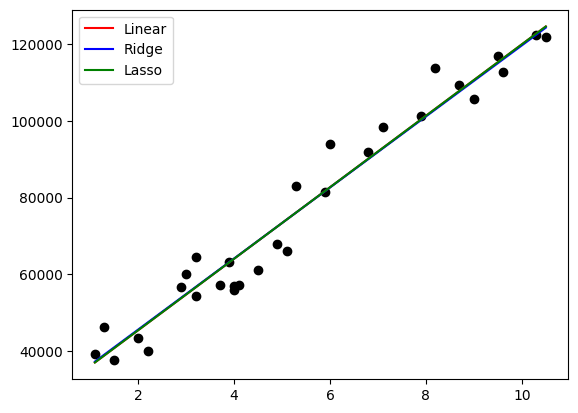

In [10]:
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='red', label="Linear")
plt.plot(x, ridge.predict(x), color='blue', label="Ridge")
plt.plot(x, lasso.predict(x), color='green', label="Lasso")
plt.legend()
plt.show()


| Feature           | Linear | Ridge   | Lasso    |
| ----------------- | ------ | ------- | -------- |
| Overfitting       | Yes    | Reduced | Reduced  |
| Coefficient       | Large  | Small   | Some = 0 |
| Feature selection | No     | No      | Yes      |
| Stability         | Low    | High    | Medium   |


🧩 When to use what?

Use Ridge when:

- Many features
- All are important

Use Lasso when:

- Want feature selection
- Some features useless

Use ElasticNet when:

- Want both Ridge + Lasso benefits